In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv(
    r'/Users/neeraj/Documents/Portfolio_project/Spotify songs/spotify_songs.csv',
    parse_dates=['track_album_release_date']
)


In [4]:
df.info(50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

EDA Summary:  Understand data distribution, detect outliers, and explore correlations with popularity. There is no missing values, we will check the outliers later.

In [5]:
df.head(5)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
#Understanding how many unique artiests are there
df['track_artist'].nunique()


10692

In [7]:

#We have 10692 unique artiest, Understanding the relationship between artist and track popularity
artist_popularity = df.groupby('track_artist').agg(
    mean_popularity=('track_popularity', 'mean'),
    number_of_songs=('track_artist', 'count')
).reset_index()

print(artist_popularity)

                                       track_artist  mean_popularity  \
0                                               !!!             50.0   
1                                          !deladap             25.2   
2      "Dear Evan Hansen" August 2018 Broadway Cast             39.0   
3                                      #TocoParaVos             43.0   
4                                             $ANFI             14.0   
...                                             ...              ...   
10687                                           真之介             26.0   
10688                                            空音             36.0   
10689                                         竹内アンナ             37.0   
10690                     落日飛車 Sunset Rollercoaster             26.0   
10691                                          香取慎吾             38.0   

       number_of_songs  
0                    2  
1                    5  
2                    1  
3                    1  
4         

In [8]:
hist().help

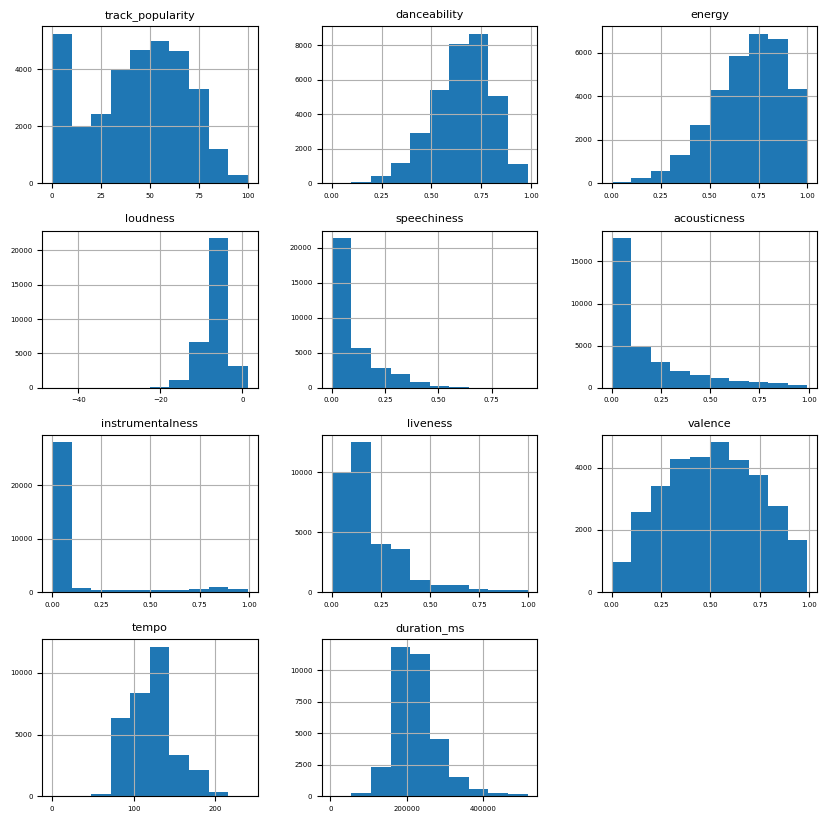

In [9]:
#Lets first understand the distribution of various numerical parameters
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


#Plotting histogram for numerical parameters
ax = df[numerical_columns].hist(figsize=[10, 10],xlabelsize=5,ylabelsize=5)
for ax in ax.flatten():
    ax.set_title(ax.get_title(), fontsize=8, color='black')  # Smaller font size and color change

plt.show()


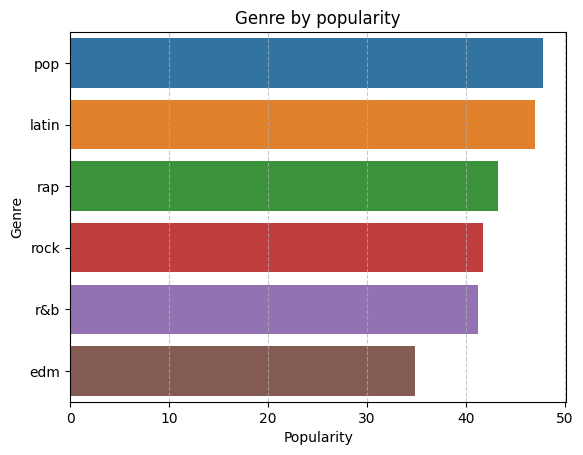

In [10]:
#Understanding popular genre popularity
genre_popularity = df.groupby('playlist_genre').agg(genre_pop = ('track_popularity','mean'),number_of_songs=('playlist_genre','count')).reset_index()
genre_popularity = genre_popularity.sort_values(by=['genre_pop'],ascending=[False])

sns.barplot(x='genre_pop', y='playlist_genre', data=genre_popularity, hue = 'playlist_genre')
plt.title("Genre by popularity")
plt.xlabel("Popularity")
plt.ylabel("Genre")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding gridlines for comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)


In [11]:
#Want to understand how various attributes of the song like loudness, mode etc vary be genre


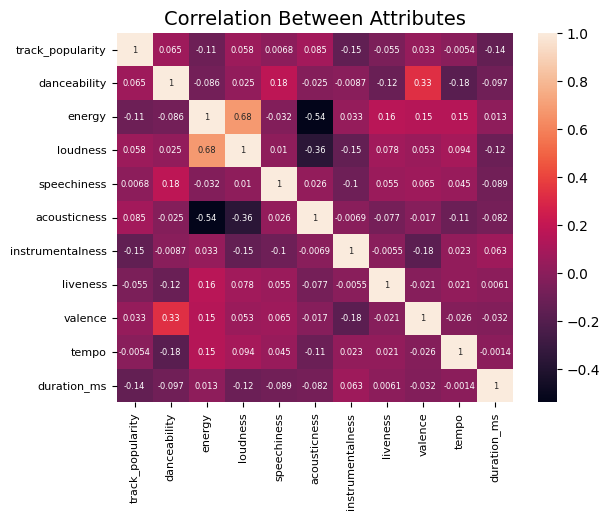

In [12]:
#What is the correlation between the various attributes of the songs
df[numerical_columns].corr() # Pearson correlations
sns.heatmap(df[numerical_columns].corr(), annot = True,annot_kws={"size": 6})

plt.title("Correlation Between Attributes", fontsize=14)
plt.xticks(fontsize=8)  
plt.yticks(fontsize=8) 
plt.show()

plt.show()

#Loudness and energy has high correlation
#Accoustic and energy has low correlation


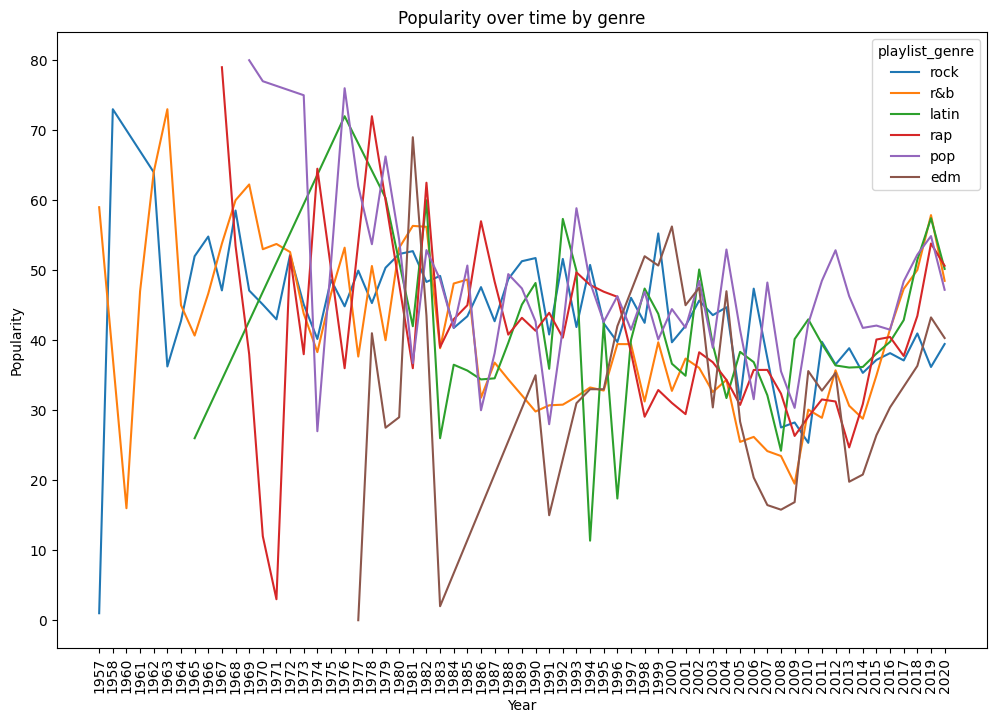

In [13]:
#Popularity of various genres over time
# Ensure the 'track_album_release_date' is in string format, then extract the year
df['release_year'] = df['track_album_release_date'].astype(str).str.extract(r"^(\d{4})")

# Group by genre and release year, then calculate the average popularity
genre_popularity_year = df.groupby(['playlist_genre', 'release_year'])['track_popularity'].mean().reset_index()

genre_popularity_year = genre_popularity_year.sort_values(by=['release_year'], ascending = [True])


#Plotting the popularity over time
plt.figure(figsize=(12, 8)) 
sns.lineplot(x='release_year', y='track_popularity', hue='playlist_genre', data=genre_popularity_year)
plt.title("Popularity over time by genre")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.show()




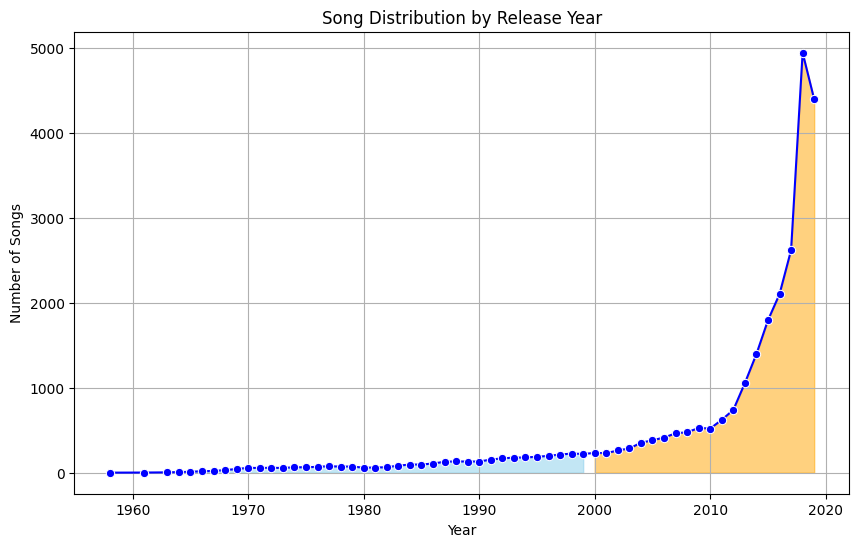

In [14]:
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Counting the number of songs released each year
yearly_tracks = df['year'].value_counts().sort_index()

# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Song Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)

# Color coding different eras
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2000, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2000, color='orange', alpha=0.5)

plt.show()

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the dataset into training and testing
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

print("Viewing training x_train", train_data.shape)
print("Viewing test test_data", test_data.shape)

Viewing training x_train (24624, 25)
Viewing test test_data (8209, 25)


In [16]:
# Converting to numpy matrix interaction_matrix_matrix = interaction_matrix.values
interaction_matrix = train_data.pivot_table(index='playlist_id', columns='track_id', values='track_popularity').fillna(0) 

#Finding the best values of K

In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

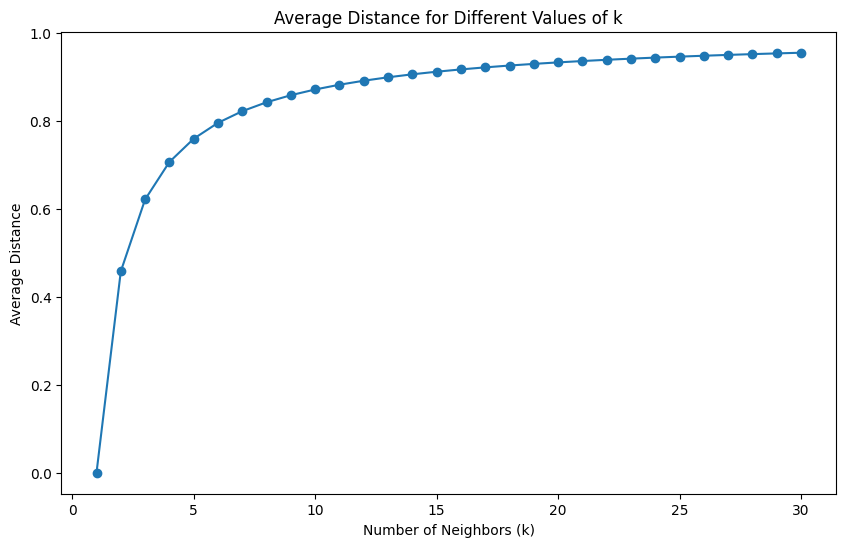

Best value of k: 1


In [18]:
# List of k values to test
k_values = list(range(1, 31))

# Metric to store the results
mean_distances = []

# Loop to find the best k
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(interaction_matrix)
    
    # Compute the distances and indices of the nearest neighbors
    distances, indices = model.kneighbors(interaction_matrix)
    
    # Calculate the average distance to the nearest neighbors
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

# Plotting the average distance metric for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

# Find the best k (the one that minimizes the average distance)
best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

#Started clustering from here

In [19]:
# 1. Select the relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = df[features]

In [20]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Viewing
scaler

StandardScaler()

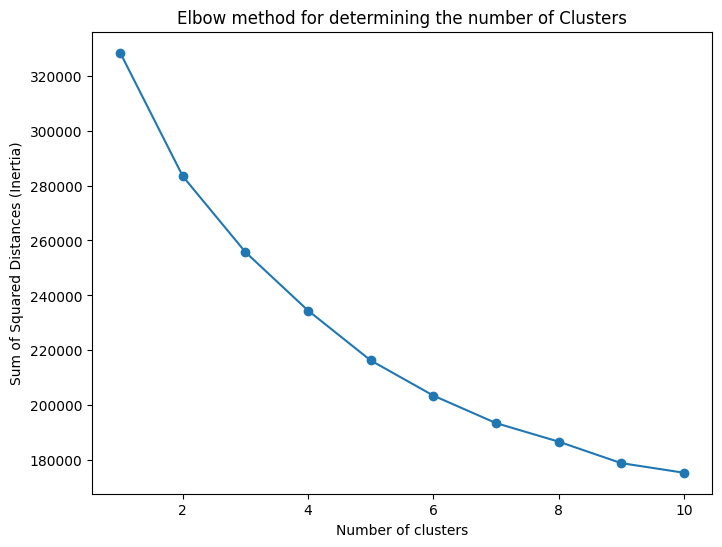

In [21]:
# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow method for determining the number of Clusters')
plt.grid(False)
plt.show()

In [22]:
# 4. Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=4, random_state=42)

In [23]:
# Viewing total cluster
df.cluster_kmeans.value_counts()

cluster_kmeans
0    13970
2    10837
1     5418
3     2608
Name: count, dtype: int64

/var/folders/yc/5rjgg5z50b78jfqjfqw0nb1w0000gn/T/ipykernel_22360/3162605017.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


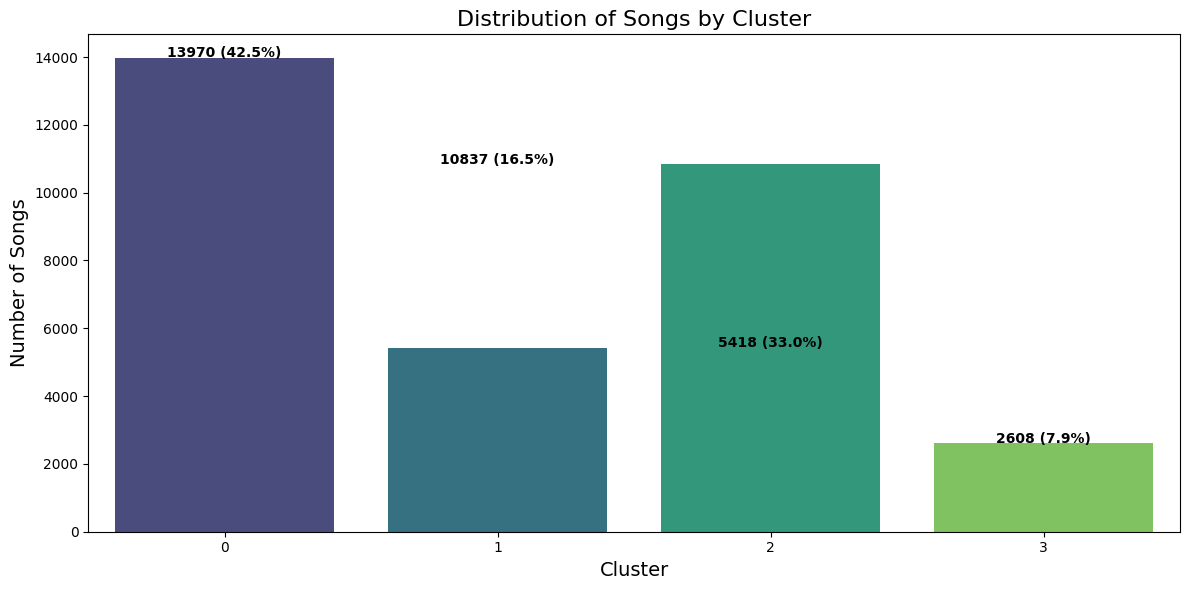

In [24]:
# Count of songs in each cluster
cluster_counts = df['cluster_kmeans'].value_counts().sort_values(ascending=False)

# Calculate the percentage of each cluster
total_songs = cluster_counts.sum()
cluster_percentages = (cluster_counts / total_songs) * 100

# Plot the distribution of clusters with percentages
plt.figure(figsize=(12, 6))  # Increase the figure size for better clarity

# Use a different color palette
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.title('Distribution of Songs by Cluster', fontsize=16)

# Adding data labels on top of bars with better position and readability
for index, value in enumerate(cluster_counts):
    plt.text(index, value + 20,  # Adjusted the position to be closer to the bars
             f'{value} ({cluster_percentages[index]:.1f}%)', 
             ha='center', 
             fontsize=10, 
             color='black', 
             weight='bold')

# Turn off the grid to make it cleaner, if needed
plt.grid(False)

# Show the plot
plt.tight_layout()  # This adjusts layout to prevent overlapping
plt.show()


#Doing PCA to reduce the components and make model more effecient

In [25]:
# Initialize the PCA model specifying the number of components to reduce to (in this case, 2 components).
pca = PCA(n_components=2)

# Apply PCA on the scaled feature set X_scaled and transform the data into the new 2-dimensional space.
X_pca = pca.fit_transform(X_scaled)

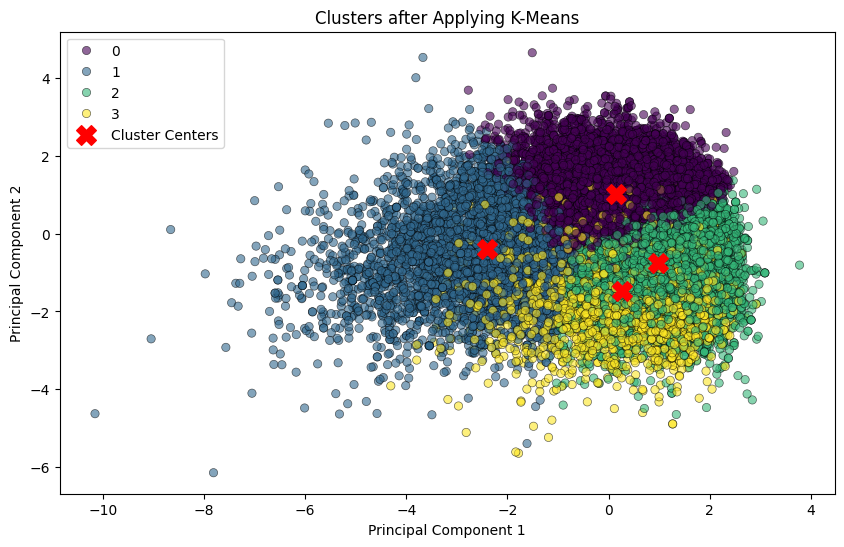

In [26]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster_kmeans'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], 
                y=X_pca[:, 1], 
                hue=df['cluster_kmeans'], 
                palette='viridis', 
                alpha=0.6, 
                edgecolor='k')

# Adding the cluster centers
centers = kmeans.cluster_centers_
# Projecting the centers to the 2D PCA space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
            c='red', 
            s=200, 
            marker='X', 
            label='Cluster Centers')

plt.title('Clusters after Applying K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()


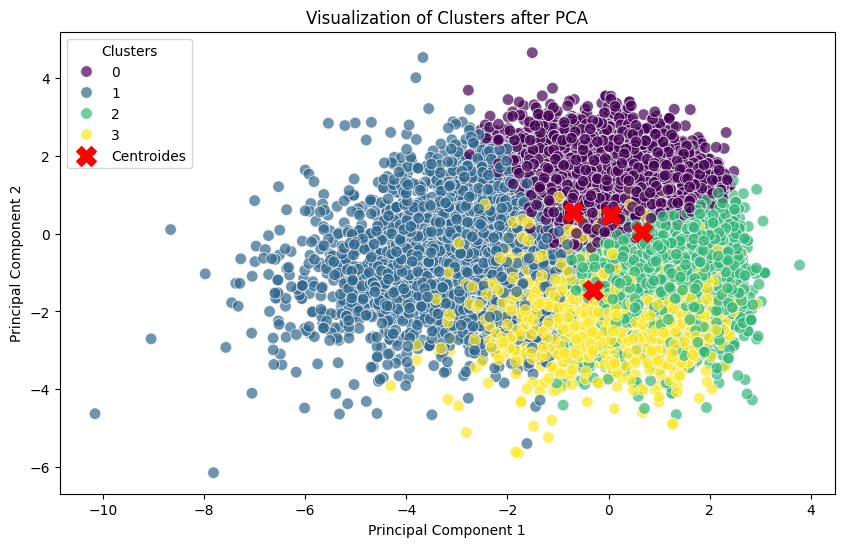

In [27]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_kmeans'], palette='viridis', s=70, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title('Visualization of Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid(False)
plt.show()

In [28]:
# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_1_features = df[df['cluster_kmeans'] == 0][features].mean()
print("Mean of Features for Cluster 0:")
print(cluster_1_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_2_features = df[df['cluster_kmeans'] == 1][features].mean()
print("Mean of Features for Cluster 1:")
print(cluster_2_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_3_features = df[df['cluster_kmeans'] == 2][features].mean()
print("Mean of Features for Cluster 2:")
print(cluster_3_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_4_features = df[df['cluster_kmeans'] == 3][features].mean()
print("Mean of Features for Cluster 3:")
print(cluster_4_features)
print()

Mean of Features for Cluster 0:
danceability             0.749967
energy                   0.705715
loudness                -6.356785
speechiness              0.135034
acousticness             0.149064
instrumentalness         0.011371
liveness                 0.163004
valence                  0.650860
tempo                  114.067444
duration_ms         220058.703651
dtype: float64

Mean of Features for Cluster 1:
danceability             0.609132
energy                   0.436545
loudness               -10.374419
speechiness              0.091388
acousticness             0.497412
instrumentalness         0.084702
liveness                 0.158093
valence                  0.399183
tempo                  112.972669
duration_ms         226330.339978
dtype: float64

Mean of Features for Cluster 2:
danceability             0.553642
energy                   0.799628
loudness                -5.305196
speechiness              0.087260
acousticness             0.072985
instrumentalness      

In [29]:
#Final recommendation - Cluster model
def recommend_songs_by_cluster_kmeans(song_name, data):
    # Search for the selected song in the dataset, ignoring case and handling missing values
    selected_song = df[df['track_name'].str.contains(song_name, case=False, na=False)]
    
    # If the song is not found, display a message and exit the function
    if selected_song.empty:
        print("Song not found.")
        return None
    
    # Retrieve the cluster to which the selected song belongs
    cluster = selected_song['cluster_kmeans'].values[0]
    
    # Find all songs that belong to the same cluster as the selected song
    recommended_songs = data[data['cluster_kmeans'] == cluster]
    
    # Exclude the selected song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]
    
    # Return only the 'track_name' and 'track_artist' columns, limited to the top 25 recommendations
    return recommended_songs[['track_name', 'track_artist']].head(30)

In [30]:
# Example of usage
# Replace with the name of the song you want to use as the base for recommendations
song_name = "Shape of You"  
top_recommendations_kmeans = recommend_songs_by_cluster_kmeans(song_name, df)

# If recommendations are found, print them
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)


Recommended music
                                           track_name        track_artist
0   I Don't Care (with Justin Bieber) - Loud Luxur...          Ed Sheeran
1                     Memories - Dillon Francis Remix            Maroon 5
4             Someone You Loved - Future Humans Remix       Lewis Capaldi
5   Beautiful People (feat. Khalid) - Jack Wins Remix          Ed Sheeran
10  Cross Me (feat. Chance the Rapper & PnB Rock) ...          Ed Sheeran
12                                         Body On My         Loud Luxury
15  South of the Border (feat. Camila Cabello & Ca...          Ed Sheeran
17  Say My Name (feat. Bebe Rexha & J Balvin) - Lu...        David Guetta
18  Dancing With A Stranger (With Normani) - Cheat...           Sam Smith
21     All Around The World (La La La) - Marnik Remix               R3HAB
23       Slow Dance (feat. Ava Max) - Sam Feldt Remix         AJ Mitchell
29            When You Leave - Breathe Carolina Remix        Nikki Vianna
32                  